In [1]:
import numpy as np
import matplotlib.pyplot as plt

import pyclesperanto as cle
from pyclesperanto.__experimental__ import sato as cle_sato
from pyclesperanto.__experimental__ import hessian_gaussian_eigenvalues
from pyclesperanto.__experimental__ import gaussian_derivative

from scipy.ndimage import gaussian_filter

from skimage.filters import sato
from skimage.feature.corner import hessian_matrix, hessian_matrix_eigvals
from skimage import data

cle.select_device(1,"gpu")

(OpenCL) NVIDIA GeForce RTX 4090 (OpenCL 3.0 CUDA)
	Vendor:                      NVIDIA Corporation
	Driver Version:              535.247.01
	Device Type:                 GPU
	Compute Units:               128
	Global Memory Size:          24217 MB
	Local Memory Size:           0 MB
	Maximum Buffer Size:         6054 MB
	Max Clock Frequency:         2625 MHz
	Image Support:               Yes

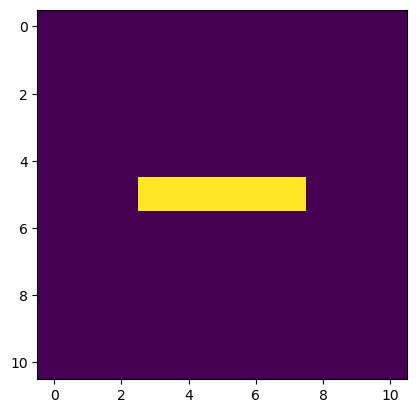

In [2]:
sigma = 2
arr = np.zeros((11,11)).astype(np.float32)
arr[5,3:8]= 1
plt.imshow(arr)

### skimage

Text(0.5, 1.0, '-0.023114226758480072 0.01617811806499958')

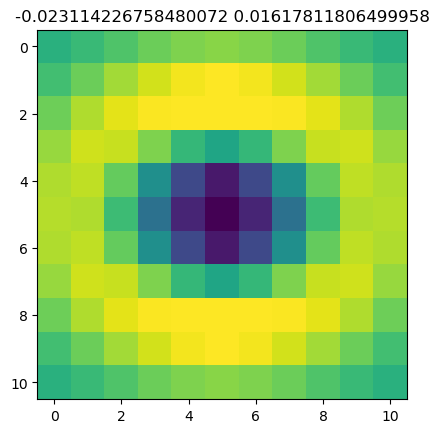

In [3]:
ei = hessian_matrix_eigvals(hessian_matrix(arr, sigma=sigma, mode="constant", cval=0, use_gaussian_derivatives=True))
plt.imshow(ei[0])
plt.title(f"{ei[0].min()} {ei[0].max()}")

In [10]:
ei[0]

array([[ 1.89560000e-03,  3.48347705e-03,  5.41017018e-03,
         7.28005543e-03,  8.63969605e-03,  9.13716294e-03,
         8.63969605e-03,  7.28005543e-03,  5.41017018e-03,
         3.48347705e-03,  1.89560000e-03],
       [ 4.30398015e-03,  7.37305870e-03,  1.06750447e-02,
         1.35265728e-02,  1.54168159e-02,  1.60745941e-02,
         1.54168159e-02,  1.35265728e-02,  1.06750447e-02,
         7.37305870e-03,  4.30398015e-03],
       [ 7.46549666e-03,  1.14684384e-02,  1.45426821e-02,
         1.59924291e-02,  1.61781181e-02,  1.60620268e-02,
         1.61781181e-02,  1.59924291e-02,  1.45426821e-02,
         1.14684384e-02,  7.46549666e-03],
       [ 1.01542324e-02,  1.32675134e-02,  1.28123788e-02,
         8.63574352e-03,  2.99061555e-03,  8.66129994e-07,
         2.99061555e-03,  8.63574352e-03,  1.28123788e-02,
         1.32675134e-02,  1.01542324e-02],
       [ 1.14905108e-02,  1.23928254e-02,  6.96545420e-03,
        -3.49344779e-03, -1.44924913e-02, -2.03982312e-02,
  

### pyclesperanto

Text(0.5, 1.0, '-0.038963433355093 0.0782855898141861')

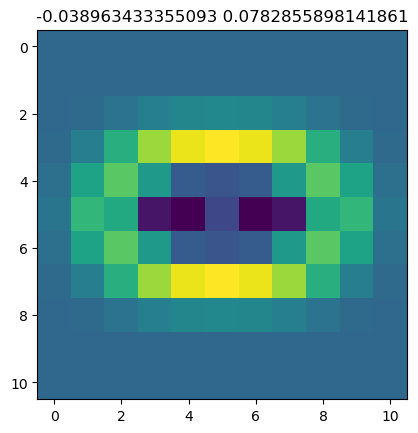

In [5]:
cl_ei_1 = hessian_gaussian_eigenvalues(arr, sigma=1)
plt.imshow(cl_ei_1[0].get())
plt.title(f"{cl_ei_1[0].min()} {cl_ei_1[0].max()}")

Text(0.5, 1.0, '-0.034218549728393555 0.0239554475992918')

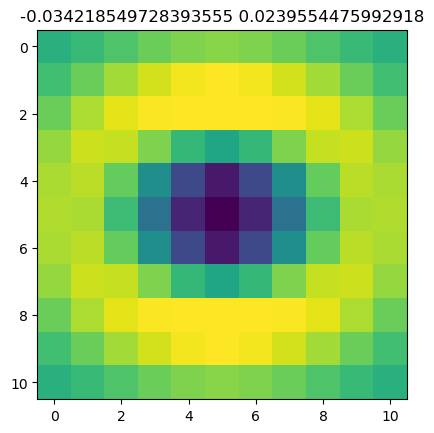

In [6]:
cl_ei_2 = hessian_gaussian_eigenvalues(arr, sigma=2)
plt.imshow(cl_ei_2[0].get())
plt.title(f"{cl_ei_2[0].min()} {cl_ei_2[0].max()}")

In [11]:
cl_ei_2[0].get()

array([[ 2.80377432e-03,  5.15507488e-03,  8.01434834e-03,
         1.07877254e-02,  1.28035750e-02,  1.35410940e-02,
         1.28035750e-02,  1.07877254e-02,  8.01434834e-03,
         5.15507488e-03,  2.80377408e-03],
       [ 6.33742381e-03,  1.08882710e-02,  1.57999620e-02,
         2.00331286e-02,  2.28355490e-02,  2.38104817e-02,
         2.28355490e-02,  2.00331286e-02,  1.57999620e-02,
         1.08882710e-02,  6.33742381e-03],
       [ 1.09319249e-02,  1.68837775e-02,  2.15000007e-02,
         2.36747041e-02,  2.39554476e-02,  2.37844288e-02,
         2.39554476e-02,  2.36747041e-02,  2.14999989e-02,
         1.68837793e-02,  1.09319249e-02],
       [ 1.47780655e-02,  1.94353256e-02,  1.88947730e-02,
         1.27731506e-02,  4.42769844e-03,  2.56299973e-06,
         4.42769844e-03,  1.27731506e-02,  1.88947730e-02,
         1.94353275e-02,  1.47780655e-02],
       [ 1.66362859e-02,  1.80286150e-02,  1.01901442e-02,
        -5.19440044e-03, -2.14566216e-02, -3.01977620e-02,
  

Text(0.5, 1.0, '-0.034218549728393555 0.0239554475992918')

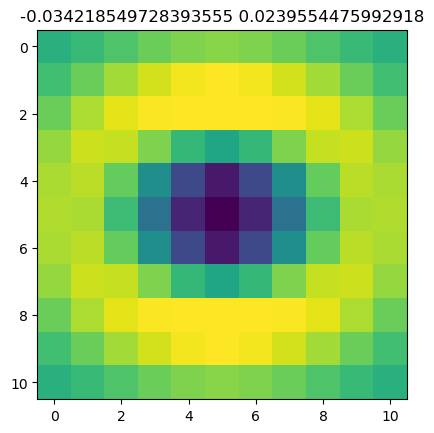

In [8]:
large = cle.create_like(arr)
hessian_gaussian_eigenvalues(arr, sigma=2, output_large=large)
plt.imshow(large.get())
plt.title(f"{large.min()} {large.max()}")

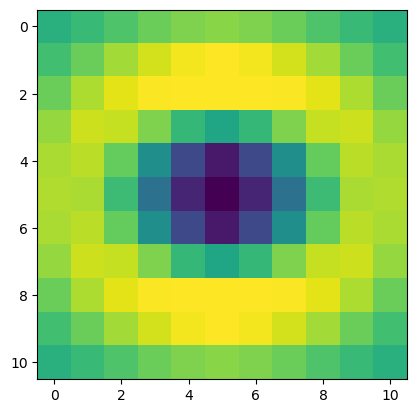

In [9]:
r = np.asarray([
    [0.00280377, 0.00515507, 0.00801435, 0.0107877, 0.0128036, 0.0135411, 0.0128036, 0.0107877, 0.00801435, 0.00515507, 0.00280377],
    [0.00633742, 0.0108883, 0.0158, 0.0200331, 0.0228355, 0.0238105, 0.0228355, 0.0200331, 0.0158, 0.0108883, 0.00633742],
    [0.0109319, 0.0168838, 0.0215, 0.0236747, 0.0239554, 0.0237844, 0.0239554, 0.0236747, 0.0215, 0.0168838, 0.0109319],
    [0.0147781, 0.0194353, 0.0188948, 0.0127732, 0.0044277, 2.563e-06, 0.0044277, 0.0127732, 0.0188948, 0.0194353, 0.0147781],
    [0.0166363, 0.0180286, 0.0101901, -0.0051944, -0.0214566, -0.0301978, -0.0214566, -0.0051944, 0.0101901, 0.0180286, 0.0166363],
    [0.017033, 0.016678, 0.00562217, -0.012508, -0.0282403, -0.0342185, -0.0282403, -0.012508, 0.00562217, 0.016678, 0.017033],
    [0.0166363, 0.0180286, 0.0101901, -0.0051944, -0.0214566, -0.0301978, -0.0214566, -0.0051944, 0.0101901, 0.0180286, 0.0166363],
    [0.0147781, 0.0194353, 0.0188948, 0.0127732, 0.0044277, 2.563e-06, 0.0044277, 0.0127732, 0.0188948, 0.0194353, 0.0147781],
    [0.0109319, 0.0168838, 0.0215, 0.0236747, 0.0239554, 0.0237844, 0.0239554, 0.0236747, 0.0215, 0.0168838, 0.0109319],
    [0.00633742, 0.0108883, 0.0158, 0.0200331, 0.0228355, 0.0238105, 0.0228355, 0.0200331, 0.0158, 0.0108883, 0.00633742],
    [0.00280377, 0.00515507, 0.00801435, 0.0107877, 0.0128036, 0.0135411, 0.0128036, 0.0107877, 0.00801435, 0.00515507, 0.00280377]
])
plt.imshow(r)